# **Data Analysis and Visualization of My Chess.com Games**
## **Ada Boran Yılmaz / 30789**


## **My Goals**
- **Performance Assessment**: Evaluate my overall performance as a chess player by analyzing my win-loss-draw record and identifying areas of strength and improvement. 
- **Opening Strategy Optimization**: Identify my most successful and unsuccessful openings when playing as both white and black, helping me refine my opening repertoire for future games. 
- **Type of Win/Loss Analysis**: Categorize and analyze the types of wins, losses, and draws in my games to understand the common patterns and scenarios leading to different game outcomes. 
- **Opponent Analysis**: Gain insights into my performance against specific opponents, including their playing styles and my success rate against them. 
- **Visualization**: Create visual representations of my game data, such as pie charts, bar graphs and other plots to present my analysis findings in an easily understandable and visually appealing format.



## **Dataset**
- The dataset is taken from my chess.com game archive and modified for the project.


## **Columns**
- **"Event"**: The name or description of the event where the chess game was played. 
- **"Site"**: The location or site where the game took place. 
- **"Date"**: The date when the game was played. 
- **"Round"**: The round or stage of the event in which the game occurred. 
- **"White"**: The name of the player who played as White in the game. 
- **"Black"**: The name of the player who played as Black in the game. 
- **"Result"**: The result of the game (e.g., "1-0" for White's win, "0-1" for Black's win or "1/2-1/2" for a draw). 
- **"WhiteElo"**: The Elo rating of the White player. 
- **"BlackElo"**: The Elo rating of the Black player. 
- **"TimeControl"**: The time control or time format used for the game (e.g., "180+2" for 3-minute blitz with 2 second increment). 
- **"EndTime"**: The time at which the game ended. 
- **"Termination"**: The reason for the game's termination (e.g., "Checkmate" or "Ran out of time"). 
- **"Moves"**: A string representing the sequence of moves made in the game.




# 1) Libraries

In [1]:
!pip install python-chess



# 2) Parsing the Dataset 

In [2]:
import pandas as pd
import re

def parse_pgn(pgn):
    """ Parse a single game's PGN data and return a dictionary with key details including moves. """
    pgn_data = {
        "Event": "",
        "Site": "",
        "Date": "",
        "Round": "",
        "White": "",
        "Black": "",
        "Result": "",
        "WhiteElo": "",
        "BlackElo": "",
        "TimeControl": "",
        "EndTime": "",
        "Termination": "",
        "Moves": ""
    }

    # Regular expression patterns for PGN data extraction
    patterns = {
        "Event": r"\[Event \"(.*?)\"\]",
        "Site": r"\[Site \"(.*?)\"\]",
        "Date": r"\[Date \"(.*?)\"\]",
        "Round": r"\[Round \"(.*?)\"\]",
        "White": r"\[White \"(.*?)\"\]",
        "Black": r"\[Black \"(.*?)\"\]",
        "Result": r"\[Result \"(.*?)\"\]",
        "WhiteElo": r"\[WhiteElo \"(.*?)\"\]",
        "BlackElo": r"\[BlackElo \"(.*?)\"\]",
        "TimeControl": r"\[TimeControl \"(.*?)\"\]",
        "EndTime": r"\[EndTime \"(.*?)\"\]",
        "Termination": r"\[Termination \"(.*?)\"\]"
    }

    # Extract data using regular expressions
    for key, pattern in patterns.items():
        match = re.search(pattern, pgn, re.MULTILINE)
        if match and match.group(1):
            pgn_data[key] = match.group(1)

    # Extract and clean moves
    moves_string = re.sub(r"\[.*?\]", "", pgn)  # Remove header
    moves_string = re.sub(r"1-0|0-1|1/2-1/2", "", moves_string)  # Remove game result
    moves_string = re.sub(r"\{.*?\}", "", moves_string)  # Remove inline annotations
    moves_string = re.sub(r"\n", " ", moves_string)  # Replace newline characters with space
    moves_string = re.sub(r"\s{2,}", " ", moves_string)  # Replace multiple spaces with a single space
    moves_string = moves_string.strip()  # Remove leading and trailing whitespace
    pgn_data["Moves"] = moves_string

    return pgn_data

def parse_pgn_files(file_paths):
    """ Parse multiple PGN files and return a DataFrame with all games' data. """
    all_games = []
    for file_path in file_paths:
        with open(file_path, 'r') as file:
            pgn_text = file.read()
            games = re.split(r"\n\n\[[Ee]vent ", pgn_text)  # Split at '[Event ' to separate individual games
            for game in games:
                if game.strip():
                    game = "[Event " + game  # Add back '[Event ' to the start of each game
                    game_data = parse_pgn(game)
                    all_games.append(game_data)

    return pd.DataFrame(all_games)

# Example usage with a list of file paths
file_paths = [rf'C:\Users\Ada\Downloads\chess_com_games_2024-01-17 ({i}).pgn' for i in range(0, 57)]
all_games_df = parse_pgn_files(file_paths)

# Display the total number of games
total_games = len(all_games_df)
print(f"Total games: {total_games}")

# Print the first 5 games
print(all_games_df.head())


Total games: 2809
        Event       Site        Date Round      White        Black   Result  \
0  Live Chess  Chess.com  2023.02.08     -  adaylmazs   jonekone69      0-1   
1  Live Chess  Chess.com  2023.02.08     -  adaylmazs  AceDuckling  1/2-1/2   
2  Live Chess  Chess.com  2023.02.08     -  Chrunchez    adaylmazs      0-1   
3  Live Chess  Chess.com  2023.02.08     -    M3rijnC    adaylmazs      0-1   
4  Live Chess  Chess.com  2023.02.08     -   Slim6284    adaylmazs      0-1   

  WhiteElo BlackElo TimeControl       EndTime  \
0      594      763         600  13:07:28 PST   
1      595      596         600  13:30:03 PST   
2      563      688         600  13:44:04 PST   
3      702      771         600  13:55:10 PST   
4      785      839         600  14:14:55 PST   

                                     Termination  \
0                         jonekone69 won on time   
1  Game drawn - timeout vs insufficient material   
2                     adaylmazs won by checkmate   
3   

# 3) Data Analysis and Visualization



## What Is My Overall Win Rate?

In [3]:
# Filter the games where I am the white or black player
your_games = all_games_df[(all_games_df['White'] == 'adaylmazs') | (all_games_df['Black'] == 'adaylmazs')]

# Count the number of games I won as White
white_wins = your_games[(your_games['White'] == 'adaylmazs') & (your_games['Result'] == '1-0')]['Result'].count()

# Count the number of games I won as Black
black_wins = your_games[(your_games['Black'] == 'adaylmazs') & (your_games['Result'] == '0-1')]['Result'].count()

# Calculate the total number of games I played
total_games = len(your_games)

# Calculate my winrate
winrate = round(((white_wins + black_wins) / total_games) * 100, 2)

# Display the number of wins and win rate
print("Number of wins: ", white_wins + black_wins)
print("Overall win rate: ", round(winrate, 2), "%")


Number of wins:  1482
Overall win rate:  52.76 %


## How Many Games Have I Played In Modes Rapid, Blitz and Bullet?

In [4]:
# Create a function to categorize games based on time control
def categorize_time_control(time_control):
    if time_control in ["600+10", "600", "900+10"]:
        return "Rapid"
    elif time_control in ["300+5", "300+2", "300", "180+2", "180"]:
        return "Blitz"
    elif time_control in ["120+1", "60+1", "60"]:
        return "Bullet"
    else:
        return "Other"

# Filter the games where I am the white or black player
your_games = all_games_df[(all_games_df['White'] == 'adaylmazs') | (all_games_df['Black'] == 'adaylmazs')]

# Add a new column 'TimeControlCategory' to categorize games
your_games['TimeControlCategory'] = your_games['TimeControl'].apply(categorize_time_control)

# Calculate the number of games played in each category
game_counts = your_games['TimeControlCategory'].value_counts()

game_counts


TimeControlCategory
Bullet    1258
Blitz     1069
Rapid      482
Name: count, dtype: int64

## What Is My Win Rate In Each Time Control?

In [5]:
# Create a function to calculate win rate for a given category
def calculate_win_rate(category):
    category_games = your_games[your_games['TimeControlCategory'] == category]
    total_games = len(category_games)
    wins = 0

    for index, row in category_games.iterrows():
        if row['White'] == 'adaylmazs' and row['Result'] == '1-0':
            wins += 1
        elif row['Black'] == 'adaylmazs' and row['Result'] == '0-1':
            wins += 1

    if total_games == 0:
        return 0
    else:
        return round((wins / total_games) * 100, 2)

# Calculate win rate for each category
win_rate_blitz = calculate_win_rate("Blitz")
win_rate_bullet = calculate_win_rate("Bullet")
win_rate_rapid = calculate_win_rate("Rapid")

print("Win rate in Blitz:", round(win_rate_blitz, 2), "%")
print("Win rate in Bullet:", round(win_rate_bullet, 2), "%")
print("Win rate in Rapid:", round(win_rate_rapid, 2), "%")


Win rate in Blitz: 52.2 %
Win rate in Bullet: 50.79 %
Win rate in Rapid: 59.13 %


## Visualization of My Results

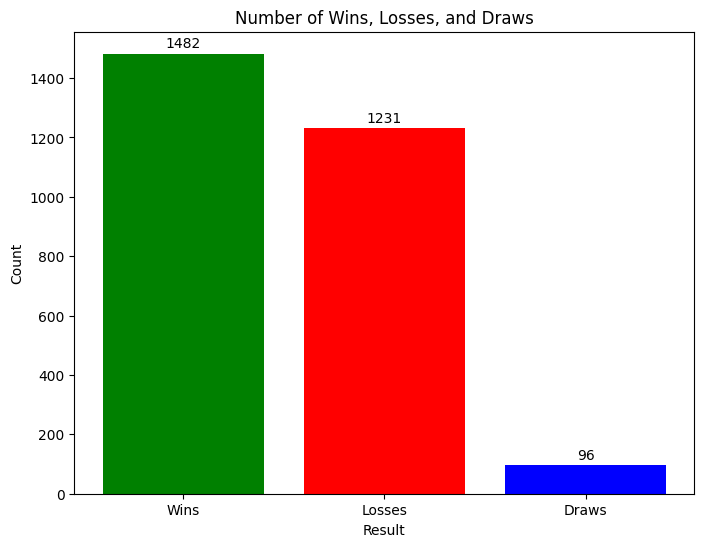

In [6]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Filter games where I am White or Black
your_games = all_games_df[(all_games_df['White'] == 'adaylmazs') | (all_games_df['Black'] == 'adaylmazs')]

# Separate wins, losses, and draws for White and Black
white_wins = your_games[(your_games['White'] == 'adaylmazs') & (your_games['Result'] == '1-0')]['Result'].count()
black_wins = your_games[(your_games['Black'] == 'adaylmazs') & (your_games['Result'] == '0-1')]['Result'].count()
white_losses = your_games[(your_games['White'] == 'adaylmazs') & (your_games['Result'] == '0-1')]['Result'].count()
black_losses = your_games[(your_games['Black'] == 'adaylmazs') & (your_games['Result'] == '1-0')]['Result'].count()
white_draws = your_games[(your_games['White'] == 'adaylmazs') & (your_games['Result'] == '1/2-1/2')]['Result'].count()
black_draws = your_games[(your_games['Black'] == 'adaylmazs') & (your_games['Result'] == '1/2-1/2')]['Result'].count()

# Calculate total wins, losses, and draws
total_wins = white_wins + black_wins
total_losses = white_losses + black_losses
total_draws = white_draws + black_draws

# Create a bar chart
results = ['Wins', 'Losses', 'Draws']
counts = [total_wins, total_losses, total_draws]

plt.figure(figsize=(8, 6))
plt.bar(results, counts, color=['green', 'red', 'blue'])
plt.title("Number of Wins, Losses, and Draws")
plt.xlabel("Result")
plt.ylabel("Count")

# Add labels to the bars
for i, count in enumerate(counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()


## How Did My Wins Occur?

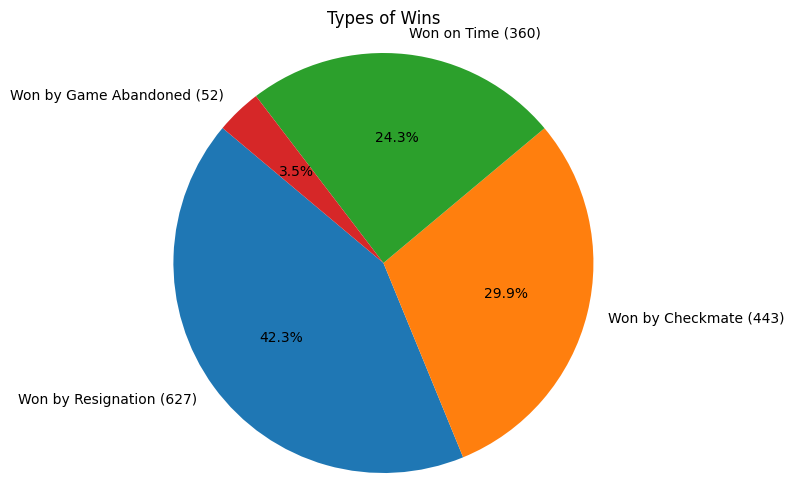

In [7]:
import matplotlib.pyplot as plt

# Filter my won games as White and create a copy of the DataFrame
white_wins = your_games[(your_games['White'] == 'adaylmazs') & (your_games['Result'] == '1-0')].copy()

# Filter my won games as Black and create a copy of the DataFrame
black_wins = your_games[(your_games['Black'] == 'adaylmazs') & (your_games['Result'] == '0-1')].copy()

# Concatenate the two DataFrames to get all my wins
your_won_games = pd.concat([white_wins, black_wins])

# Create a function to categorize the types of wins
def categorize_win_type(termination):
    if 'won on time' in termination:
        return 'Won on Time'
    elif 'checkmate' in termination:
        return 'Won by Checkmate'
    elif 'abandoned' in termination:
        return 'Won by Game Abandoned'
    elif 'resignation' in termination:
        return 'Won by Resignation'
    else:
        return 'Other'

# Add a new column 'WinType' to categorize the types of wins
your_won_games['WinType'] = your_won_games['Termination'].apply(categorize_win_type)

# Calculate the number and percentage of each type of win
win_type_counts = your_won_games['WinType'].value_counts()
total_won_games = len(your_won_games)
win_type_percentages = (win_type_counts / total_won_games) * 100

# Create a pie chart to visualize the types of wins
plt.figure(figsize=(8, 6))
plt.pie(win_type_counts, labels=[f"{win_type} ({count})" for win_type, count in zip(win_type_counts.index, win_type_counts)], autopct='%1.1f%%', startangle=140)
plt.title("Types of Wins")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


## How Did My Draws Occur?

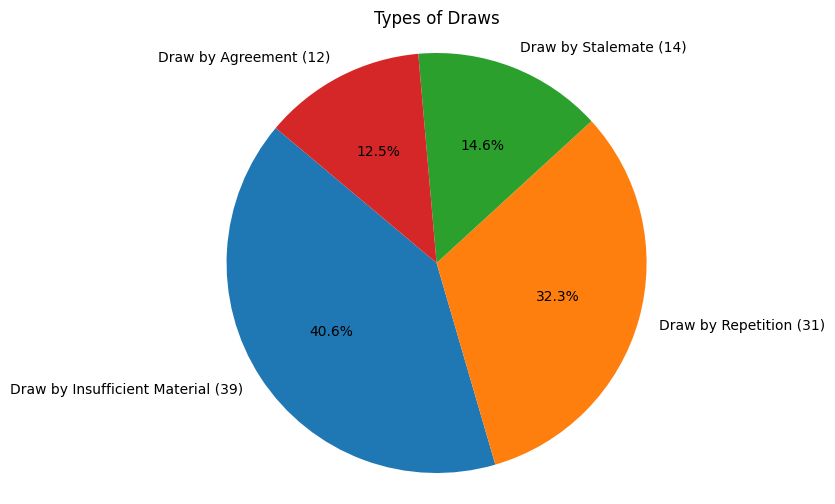

In [8]:
import matplotlib.pyplot as plt

# Filter my drawn games as White and create a copy of the DataFrame
white_draws = your_games[(your_games['White'] == 'adaylmazs') & (your_games['Result'] == '1/2-1/2')].copy()

# Filter my drawn games as Black and create a copy of the DataFrame
black_draws = your_games[(your_games['Black'] == 'adaylmazs') & (your_games['Result'] == '1/2-1/2')].copy()

# Concatenate the two DataFrames to get all my drawn games
your_drawn_games = pd.concat([white_draws, black_draws])

# Create a function to categorize the types of draws
def categorize_draw_type(termination):
    if 'insufficient material' in termination:
        return 'Draw by Insufficient Material'
    elif 'repetition' in termination:
        return 'Draw by Repetition'
    elif 'agreement' in termination:
        return 'Draw by Agreement'
    elif 'stalemate' in termination:
        return 'Draw by Stalemate'
    else:
        return 'Other'

# Add a new column 'DrawType' to categorize the types of draws
your_drawn_games['DrawType'] = your_drawn_games['Termination'].apply(categorize_draw_type)

# Calculate the number of each type of draw
draw_type_counts = your_drawn_games['DrawType'].value_counts()

# Create a pie chart to visualize the types of draws
plt.figure(figsize=(8, 6))
plt.pie(draw_type_counts, labels=[f"{draw_type} ({count})" for draw_type, count in zip(draw_type_counts.index, draw_type_counts)], autopct='%1.1f%%', startangle=140)
plt.title("Types of Draws")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


## How Did My Losses Occur?

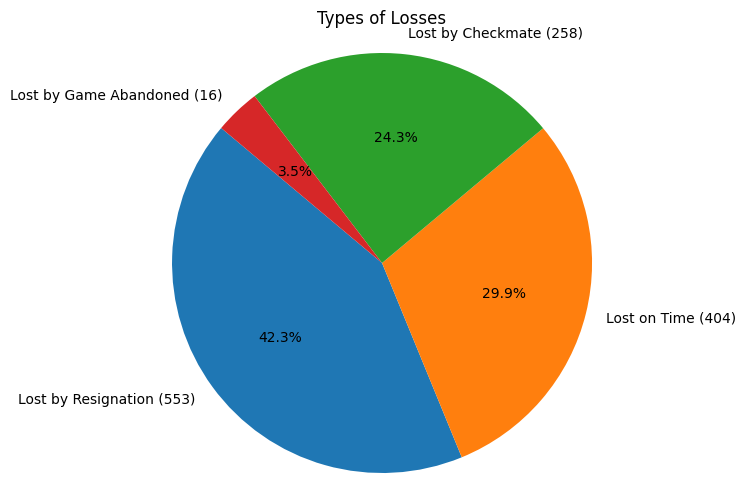

In [9]:
import matplotlib.pyplot as plt

# Filter my lost games as White and create a copy of the DataFrame
white_losses = your_games[(your_games['White'] == 'adaylmazs') & (your_games['Result'] == '0-1')].copy()

# Filter my lost games as Black and create a copy of the DataFrame
black_losses = your_games[(your_games['Black'] == 'adaylmazs') & (your_games['Result'] == '1-0')].copy()

# Concatenate the two DataFrames to get all my losses
your_lost_games = pd.concat([white_losses, black_losses])

# Create a function to categorize the types of losses
def categorize_win_type(termination):
    if 'won on time' in termination:
        return 'Lost on Time'
    elif 'checkmate' in termination:
        return 'Lost by Checkmate'
    elif 'abandoned' in termination:
        return 'Lost by Game Abandoned'
    elif 'resignation' in termination:
        return 'Lost by Resignation'
    else:
        return 'Other'

# Add a new column 'LossType' to categorize the types of losses
your_lost_games['LossType'] = your_lost_games['Termination'].apply(categorize_win_type)

# Calculate the number and percentage of each type of loss
loss_type_counts = your_lost_games['LossType'].value_counts()
total_lost_games = len(your_lost_games)
loss_type_percentages = (loss_type_counts / total_lost_games) * 100

# Create a pie chart to visualize the types of losses
plt.figure(figsize=(8, 6))
plt.pie(win_type_counts, labels=[f"{win_type} ({count})" for win_type, count in zip(loss_type_counts.index, loss_type_counts)], autopct='%1.1f%%', startangle=140)
plt.title("Types of Losses")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


## My Average Elo for Each Game Mode by Month

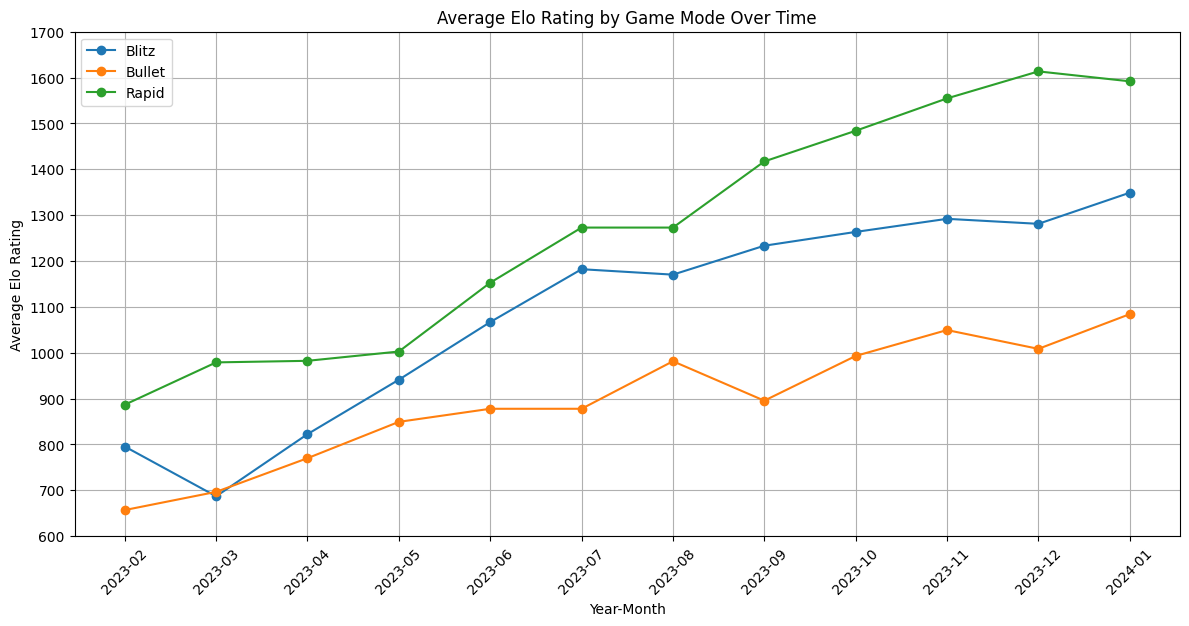

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter the games where I am the player (either White or Black)
your_games = all_games_df[(all_games_df['White'] == 'adaylmazs') | (all_games_df['Black'] == 'adaylmazs')]

# Convert the 'Date' column to datetime format
your_games['Date'] = pd.to_datetime(your_games['Date'])

# Extract month and year from the 'Date' column
your_games['YearMonth'] = your_games['Date'].dt.to_period('M')

# Create a function to categorize games based on time control
def categorize_time_control(time_control):
    if "600" in time_control or "900" in time_control:
        return "Rapid"
    elif "300" in time_control or "180" in time_control:
        return "Blitz"
    elif "120" in time_control or "60" in time_control:
        return "Bullet"
    else:
        return "Other"

# Add a new column 'TimeControlCategory' to categorize games
your_games['TimeControlCategory'] = your_games['TimeControl'].apply(categorize_time_control)

# Convert Elo ratings to numeric (handling non-numeric values)
your_games['Elo'] = pd.to_numeric(your_games['WhiteElo'].where(your_games['White'] == 'adaylmazs').fillna(your_games['BlackElo']), errors='coerce')

# Group and calculate the average Elo ratings for each game mode by month
elo_by_month = your_games.groupby(['YearMonth', 'TimeControlCategory'])['Elo'].mean().unstack()

# Manually convert the 'YearMonth' index to a list of strings
elo_by_month.index = [str(month) for month in elo_by_month.index]

# Resample the data to fill in missing months with the average of the previous and next months
elo_by_month.index = pd.to_datetime(elo_by_month.index)
elo_by_month_resampled = elo_by_month.resample('M').mean().ffill().bfill()

# Plot the average Elo ratings for each game mode over time
plt.figure(figsize=(12, 6))
plt.plot(elo_by_month_resampled.index.strftime('%Y-%m'), elo_by_month_resampled['Blitz'], label='Blitz', marker='o', linestyle='-')
plt.plot(elo_by_month_resampled.index.strftime('%Y-%m'), elo_by_month_resampled['Bullet'], label='Bullet', marker='o', linestyle='-')
plt.plot(elo_by_month_resampled.index.strftime('%Y-%m'), elo_by_month_resampled['Rapid'], label='Rapid', marker='o', linestyle='-')

plt.title('Average Elo Rating by Game Mode Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Average Elo Rating')
plt.grid(True)
plt.legend()

# Set the y-axis ticks to go up by 100
plt.yticks(np.arange(600, 1800, 100))  # Adjust the range as needed

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


## What Is My Peak Rating For Each Time Control?

In [11]:
# Find the highest Elo rating in Blitz
highest_elo_blitz = your_games[your_games['TimeControlCategory'] == 'Blitz']['Elo'].max()

# Find the highest Elo rating in Bullet
highest_elo_bullet = your_games[your_games['TimeControlCategory'] == 'Bullet']['Elo'].max()

# Find the highest Elo rating in Rapid
highest_elo_rapid = your_games[your_games['TimeControlCategory'] == 'Rapid']['Elo'].max()

# Print the results
print(f"Highest Elo for adaylmazs in Blitz: {highest_elo_blitz}")
print(f"Highest Elo for adaylmazs in Bullet: {highest_elo_bullet}")
print(f"Highest Elo for adaylmazs in Rapid: {highest_elo_rapid}")


Highest Elo for adaylmazs in Blitz: 1367
Highest Elo for adaylmazs in Bullet: 1129
Highest Elo for adaylmazs in Rapid: 1633


## How Many Games Did I Play As White or Black?

In [12]:
import pandas as pd

# Count the number of games where I played as White and Black
white_games = all_games_df[all_games_df['White'] == 'adaylmazs']
black_games = all_games_df[all_games_df['Black'] == 'adaylmazs']

# Calculate the total number of games I played
total_games = len(all_games_df)

# Calculate the number of games played as White and Black
white_count = len(white_games)
black_count = len(black_games)

# Calculate the percentages
white_percentage = (white_count / total_games) * 100
black_percentage = (black_count / total_games) * 100

# Print the results
print(f"Total games played: {total_games}")
print(f"Games played as White: {white_count} ({white_percentage:.2f}%)")
print(f"Games played as Black: {black_count} ({black_percentage:.2f}%)")


Total games played: 2809
Games played as White: 1403 (49.95%)
Games played as Black: 1406 (50.05%)


## Number Of Games Played Each Month

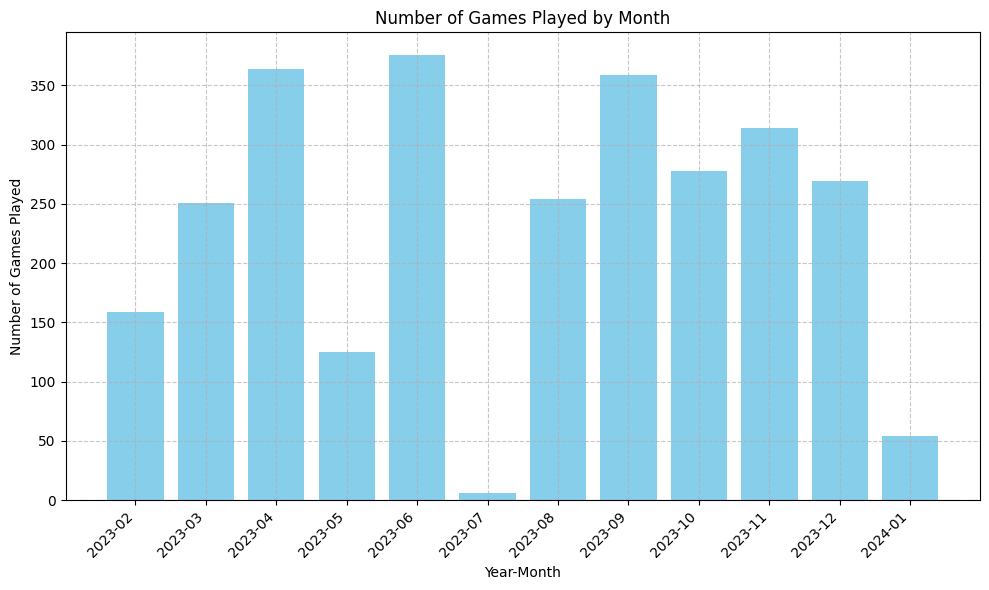

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime
your_games['Date'] = pd.to_datetime(your_games['Date'])

# Extract the year and month from the 'Date' column
your_games['YearMonth'] = your_games['Date'].dt.to_period('M').astype(str)  # Convert Period to string

# Calculate the total number of games played in each month
games_per_month = your_games['YearMonth'].value_counts().sort_index()

# Create a bar graph for the number of games played
plt.figure(figsize=(10, 6))
plt.bar(games_per_month.index, games_per_month.values, color='skyblue')
plt.title('Number of Games Played by Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Games Played')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid
plt.tight_layout()
plt.show()


## What Was My Most Successful Month?

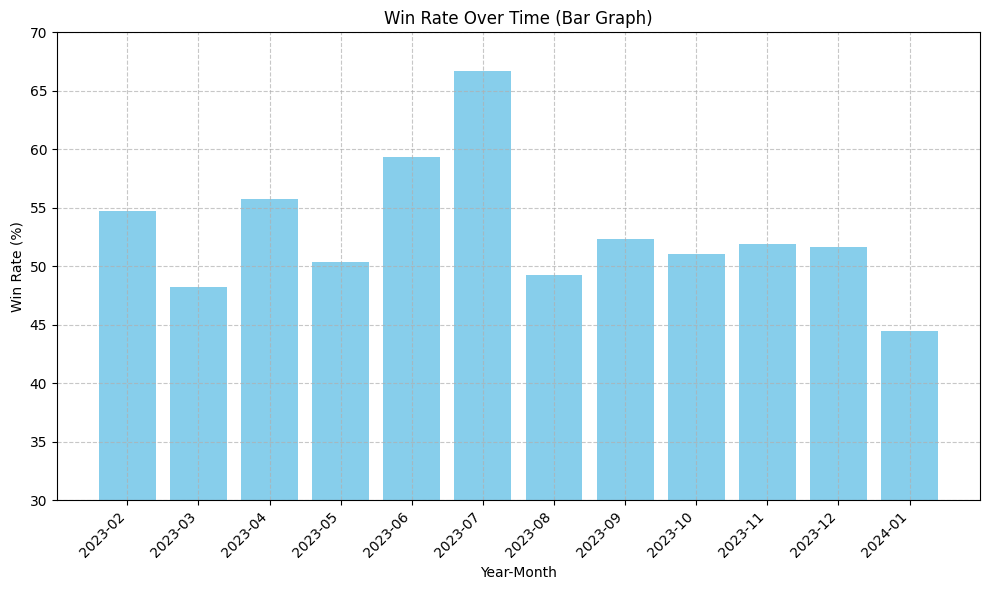

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 'Date' contains the date of each game, and 'Result' contains the result of each game (e.g., 'Win', 'Loss', 'Draw')

# Convert the 'Date' column to datetime
your_games['Date'] = pd.to_datetime(your_games['Date'])

# Extract the year and month from the 'Date' column
your_games['YearMonth'] = your_games['Date'].dt.to_period('M').astype(str)  # Convert Period to string

# Calculate the total number of games played in each month
games_per_month = your_games['YearMonth'].value_counts().sort_index()

# Calculate the number of wins as White in each month
white_wins_per_month = your_games[(your_games['Result'] == '1-0') & (your_games['White'] == 'adaylmazs')]['YearMonth'].value_counts().sort_index()

# Calculate the number of wins as Black in each month
black_wins_per_month = your_games[(your_games['Result'] == '0-1') & (your_games['Black'] == 'adaylmazs')]['YearMonth'].value_counts().sort_index()

# Add white and black wins to get the total wins in each month
total_wins_per_month = white_wins_per_month + black_wins_per_month

# Calculate the win rate for each month
win_rate_per_month = (total_wins_per_month / games_per_month).fillna(0) * 100  # Multiply by 100 to get a percentage

# Find the month with the highest win rate
most_successful_month = win_rate_per_month.idxmax()

# Create a bar graph for the win rate over time with y-axis limits from 30% to 60%
plt.figure(figsize=(10, 6))
plt.bar(win_rate_per_month.index, win_rate_per_month.values, color='skyblue')
plt.title('Win Rate Over Time (Bar Graph)')
plt.xlabel('Year-Month')
plt.ylabel('Win Rate (%)')
plt.ylim(30, 70)  # Set y-axis limits
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid
plt.tight_layout()
plt.show()


## Number Of Games Played Each Day of the Week

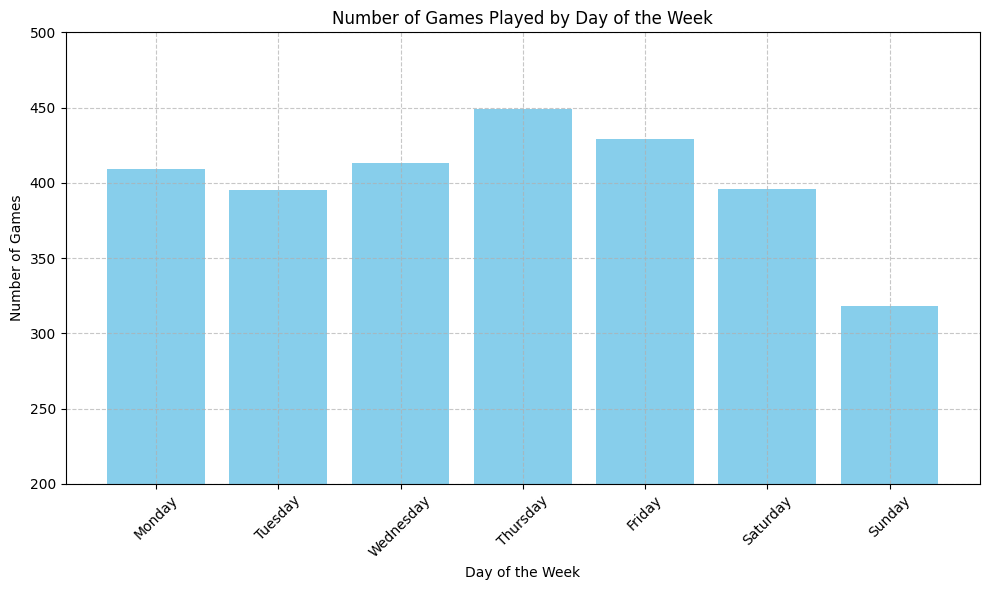

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime
your_games['Date'] = pd.to_datetime(your_games['Date'])

# Extract the day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
your_games['DayOfWeek'] = your_games['Date'].dt.dayofweek

# Count the number of games played on each day of the week
games_by_day_of_week = your_games['DayOfWeek'].value_counts().sort_index()

# Create a dictionary to map day of the week to its name
days_of_week = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Rename the index of the result DataFrame to day names
games_by_day_of_week.index = games_by_day_of_week.index.map(days_of_week)

# Create a bar chart to visualize the number of games played on each day of the week
plt.figure(figsize=(10, 6))
plt.bar(games_by_day_of_week.index, games_by_day_of_week.values, color='skyblue')
plt.title('Number of Games Played by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Games')
plt.ylim(200, 500)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid
plt.show()


## Which Day of the Week Is My Most Successful?

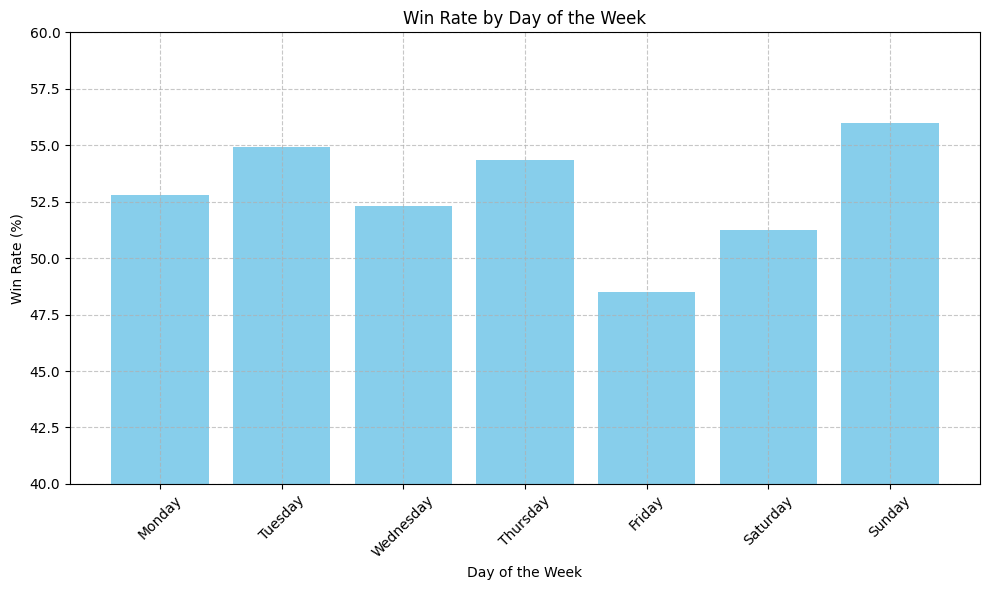

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime
your_games['Date'] = pd.to_datetime(your_games['Date'])

# Extract the day of the week (0=Monday, 1=Tuesday, ..., 6=Sunday)
your_games['DayOfWeek'] = your_games['Date'].dt.dayofweek

# Count the number of games played on each day of the week
games_by_day_of_week = your_games['DayOfWeek'].value_counts().sort_index()

# Create a dictionary to map day of the week to its name
days_of_week = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Filter my games where I won as White
white_wins = your_games[(your_games['White'] == 'adaylmazs') & (your_games['Result'] == '1-0')]

# Filter my games where I won as Black
black_wins = your_games[(your_games['Black'] == 'adaylmazs') & (your_games['Result'] == '0-1')]

# Concatenate the two DataFrames to get all my wins
your_wins = pd.concat([white_wins, black_wins])

# Count the number of wins in each day of the week
wins_by_day_of_week = your_wins['DayOfWeek'].value_counts().sort_index()

# Calculate the win rate for each day of the week
win_rate_by_day_of_week = (wins_by_day_of_week / games_by_day_of_week * 100).fillna(0)

# Create a bar chart to visualize the win rate on each day of the week
plt.figure(figsize=(10, 6))
plt.bar(win_rate_by_day_of_week.index.map(days_of_week.get), win_rate_by_day_of_week.values, color='skyblue')
plt.title('Win Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Win Rate (%)')
plt.ylim(40, 60)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid
plt.show()


# 4) Deeper Dive into the Games

## What Is the Average Number Of Moves In a Game? 

In [17]:
# Function to count the number of moves (plies) in a game's move sequence
def count_moves(move_sequence):
    # Splitting the move sequence into individual moves and filtering out empty strings
    moves = [move for move in move_sequence.split(' ') if move]
    return len(moves) // 2  # Dividing by 2 to get the count of full moves

# Apply the function to each game and add a new column for move counts
all_games_df['MoveCount'] = all_games_df['Moves'].apply(count_moves)

# Calculate the average number of moves per game
average_moves = all_games_df['MoveCount'].mean()
print(f"Average number of moves per game: {average_moves:.2f}")


Average number of moves per game: 71.56


## What Are My First Moves as White?

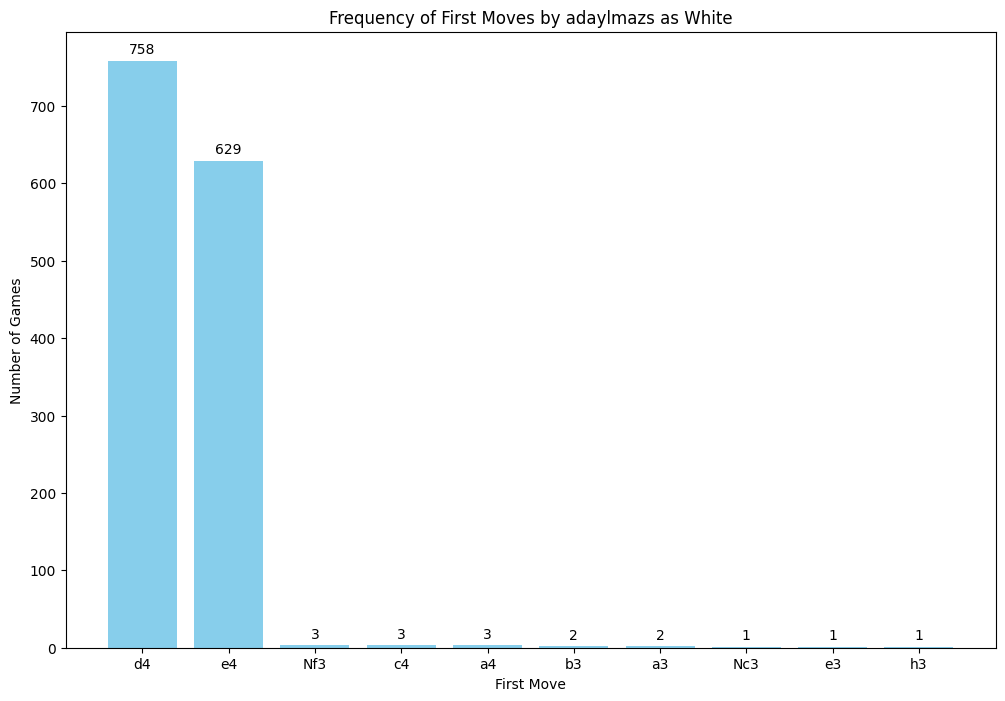

In [30]:
import matplotlib.pyplot as plt

# Filter for games where I am the white player and create a copy to avoid the warning
adaylmazs_white_games = all_games_df[all_games_df['White'] == 'adaylmazs'].copy()

# Function to extract the first move
def extract_first_move(moves):
    # Split the moves string by space and extract the first move after "1."
    moves_list = moves.split()
    # Find the index of "1." and get the next element in the list, which is the first move
    try:
        move_index = moves_list.index('1.') + 1
    except ValueError:
        return None  # In case "1." is not found, return None
    return moves_list[move_index] if len(moves_list) > move_index else None

# Apply the function to extract the first move for each game
adaylmazs_white_games['FirstMove'] = adaylmazs_white_games['Moves'].apply(extract_first_move)

# Calculate the frequency of each first move
first_move_counts = adaylmazs_white_games['FirstMove'].value_counts()

# Check if we have extracted moves properly
if not first_move_counts.empty:
    # Create a bar chart to visualize the frequency of first moves
    plt.figure(figsize=(12, 8))
    bars = plt.bar(first_move_counts.index, first_move_counts.values, color='skyblue')
    plt.xlabel('First Move')
    plt.ylabel('Number of Games')
    plt.title('Frequency of First Moves by adaylmazs as White')
    plt.xticks(rotation=0)  # Rotate the x labels to show each move clearly
    
    # Add text annotations on top of each bar with the exact number
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')
    
    plt.show()
else:
    print("No valid first moves found for 'adaylmazs' as the white player.")


## 1.e4 or 1.d4?

In [19]:
# Function to determine if I won the game
def did_adaylmazs_win(result):
    return result == '1-0'

# Filter games where I played as white
adaylmazs_white_games = all_games_df[all_games_df['White'] == 'adaylmazs'].copy()

# Apply the function to extract the first move for each game
adaylmazs_white_games['FirstMove'] = adaylmazs_white_games['Moves'].apply(extract_first_move)

# Filter games where the first move was 'e4' or 'd4'
e4_games = adaylmazs_white_games[adaylmazs_white_games['FirstMove'] == 'e4']
d4_games = adaylmazs_white_games[adaylmazs_white_games['FirstMove'] == 'd4']

# Determine the win rate for 'e4' games
e4_wins = e4_games['Result'].apply(did_adaylmazs_win).sum()
e4_win_rate = (e4_wins / len(e4_games)) * 100 if len(e4_games) > 0 else 0

# Determine the win rate for 'd4' games
d4_wins = d4_games['Result'].apply(did_adaylmazs_win).sum()
d4_win_rate = (d4_wins / len(d4_games)) * 100 if len(d4_games) > 0 else 0

print(f"Win rate for 'adaylmazs' as white with 1.e4: {e4_win_rate:.2f}%")
print(f"Win rate for 'adaylmazs' as white with 1.d4: {d4_win_rate:.2f}%")


Win rate for 'adaylmazs' as white with 1.e4: 51.35%
Win rate for 'adaylmazs' as white with 1.d4: 53.83%


## What Are The First Moves Against Me When I Am Playing As Black?

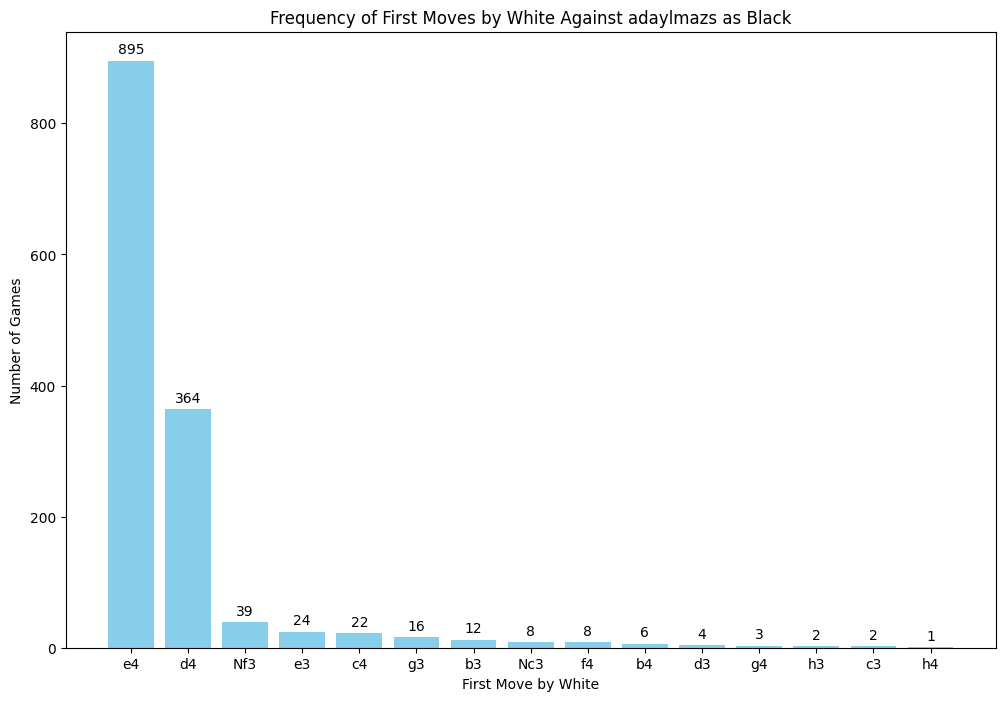

In [31]:
# Filter for games where I am the black player and create a copy to avoid the warning
adaylmazs_black_games = all_games_df[all_games_df['Black'] == 'adaylmazs'].copy()

# Apply the function to extract the first move for each game by white when I am playing black
adaylmazs_black_games['FirstMoveByWhite'] = adaylmazs_black_games['Moves'].apply(extract_first_move)

# Calculate the frequency of each first move by white
first_move_counts_black = adaylmazs_black_games['FirstMoveByWhite'].value_counts()

# Check if we have extracted moves properly
if not first_move_counts_black.empty:
    # Create a bar chart to visualize the frequency of first moves by white
    plt.figure(figsize=(12, 8))
    bars = plt.bar(first_move_counts_black.index, first_move_counts_black.values, color='skyblue')
    plt.xlabel('First Move by White')
    plt.ylabel('Number of Games')
    plt.title('Frequency of First Moves by White Against adaylmazs as Black')
    plt.xticks(rotation=0)  # Rotate the x labels to show each move clearly
    
    # Add text annotations on top of each bar with the exact number
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')
    
    plt.show()
else:
    print("No valid first moves by white found when 'adaylmazs' is playing as black.")


## 1.e4 or 1.d4 Against Me?

In [21]:
# Function to determine if I won the game
def is_success(result):
    return result in ['0-1']

# Filter games where I played as black
adaylmazs_black_games = all_games_df[all_games_df['Black'] == 'adaylmazs'].copy()

# Apply the function to extract the first move made by the white player
adaylmazs_black_games['FirstMoveByWhite'] = adaylmazs_black_games['Moves'].apply(extract_first_move)

# Filter games by the specific first moves by white
e4_games_black = adaylmazs_black_games[adaylmazs_black_games['FirstMoveByWhite'] == 'e4']
d4_games_black = adaylmazs_black_games[adaylmazs_black_games['FirstMoveByWhite'] == 'd4']

# Calculate the success rate for games against 'e4'
e4_successes = e4_games_black['Result'].apply(is_success).sum()
e4_success_rate = (e4_successes / len(e4_games_black)) * 100 if len(e4_games_black) > 0 else 0

# Calculate the success rate for games against 'd4'
d4_successes = d4_games_black['Result'].apply(is_success).sum()
d4_success_rate = (d4_successes / len(d4_games_black)) * 100 if len(d4_games_black) > 0 else 0


print(f"Win rate for 'adaylmazs' as black against 1.e4: {e4_success_rate:.2f}%")
print(f"Win rate for 'adaylmazs' as black against 1.d4: {d4_success_rate:.2f}%")


Win rate for 'adaylmazs' as black against 1.e4: 55.42%
Win rate for 'adaylmazs' as black against 1.d4: 47.53%


## Which Openings I Play / Encounter Most Often As White?

In [22]:
famous_openings = {
    "Ruy Lopez": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bb5"],
    "Ruy Lopez Berlin Defense": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bb5 3... Nf6"],
    "Italian Game": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bc4"],
    "Italian Game Two Knights Defense": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bc4 3... Nf6"],
    "Sicilian Defense": ["1. e4 1... c5"],
    "Sicilian Najdorf": ["1. e4 1... c5 2. Nf3 2... d6"],
    "French Defense": ["1. e4 1... e6"],
    "Caro-Kann Defense": ["1. e4 1... c6"],
    "Pirc Defense": ["1. e4 1... d6"],
    "English Opening": ["1. c4"],
    "Queen's Gambit": ["1. d4 1... d5 2. c4"],
    "King's Indian Defense": ["1. d4 1... Nf6 2. c4 2... g6"],
    "Nimzo-Indian Defense": ["1. d4 1... Nf6 2. c4 2... e6 3. Nc3 3... Bb4"],
    "Accelerated London System": ["1. d4 1... d5 2. Bf4"],
    "London System": ["1. d4 1... d5 2. Nf3"],
    "London System vs Kings Indian": ["1. d4 1... Nf6 2. Nf3 2... g6 3. Bf4"],
    "Grünfeld Defense": ["1. d4 1... Nf6 2. c4 2... g6 3. Nc3 3... d5"],
    "Slav Defense": ["1. d4 1... d5 2. c4 2... c6"],
    "Scandinavian Defense": ["1. e4 1... d5"],
    "Benoni Defense": ["1. d4 1... Nf6 2. c4 2... c5"],
    "Dutch Defense": ["1. d4 1... f5"],
    "Reti Opening": ["1. Nf3"],
    "King's Gambit": ["1. e4 1... e5 2. f4"],
    "Philidor Defense": ["1. e4 1... e5 2. Nf3 2... d6"],
    "Alekhine's Defense": ["1. e4 1... Nf6"],
    "Bird's Opening": ["1. f4"],
    "Giuoco Piano": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bc4 3... Bc5"],
    "Vienna Game": ["1. e4 1... e5 2. Nc3"],
    "Evans Gambit": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bc4 3... Bc5 4. b4"],
    "Bogo-Indian Defense": ["1. d4 1... Nf6 2. c4 2... e6 3. Nf3 3... Bb4+"],
    "Catalan Opening": ["1. d4 1... d5 2. c4 2... e6 3. g3"],
    "King's Indian Attack": ["1. e4 1... d6 2. d3"],
    "Sicilian Dragon": ["1. e4 1... c5 2. Nf3 2... d6 3. d4 3... cxd4 4. Nxd4 4... Nf6 5. Nc3 5... g6"],
    "Sicilian Alapin": ["1. e4 1... c5 2. c3"],
    "Benko Gambit": ["1. d4 1... Nf6 2. c4 2... c5 3. d5 3... b5"],
    "Budapest Gambit": ["1. d4 1... Nf6 2. c4 2... e5"],
    "Old Indian Defense": ["1. d4 1... Nf6 2. c4 2... d6"],
    "Sicilian Scheveningen": ["1. e4 1... c5 2. Nf3 2... d6 3. d4 3... cxd4 4. Nxd4 4... Nf6 5. Nc3 5... e6"],
    "Four Knights Game": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Nc3 3... Nf6"],
    "Queen's Indian Defense": ["1. d4 1... Nf6 2. c4 2... e6 3. Nf3 3... b6"],
    "Bogo-Indian Defense": ["1. d4 1... Nf6 2. c4 2... e6 3. Nf3 3... Bb4+"],
    "Trompowsky Attack": ["1. d4 1... Nf6 2. Bg5"],
    "King's Fianchetto Opening": ["1. g3"],
    "Nimzowitsch Defense": ["1. e4 1... Nc6"],
    "Orangutan/Sokolsky Opening": ["1. b4"],
    "Scotch Game": ["1. e4 1... e5 2. Nf3 2... Nc6 3. d4 3... exd4 4. Nxd4"],
    "Vienna Gambit": ["1. e4 1... e5 2. Nc3 2... Nf6 3. f4"],
    "Center Game": ["1. e4 1... e5 2. d4 2... exd4 3. Qxd4"],
    "Modern Defense": ["1. e4 1... g6 2. d4 2... Bg7"],
    "Sicilian Kan": ["1. e4 1... c5 2. Nf3 2... e6 3. d4 3... cxd4 4. Nxd4 4... a6"],
    "Ruy Lopez Exchange Variation": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bb5 3... a6 4. Ba4 4... Nf6 5. O-O 5... Be7 6. Bxc6"],
    "Grunfeld Defense, Russian System": ["1. d4 1... Nf6 2. c4 2... g6 3. Nc3 3... d5 4. Qb3"],
    "Sicilian Defense, Dragon Variation": ["1. e4 1... c5 2. Nf3 2... d6 3. d4 3... cxd4 4. Nxd4 4... Nf6 5. Nc3 5... g6 6. Be3 6... Bg7 7. f3 7... O-O 8. Qd2"],
    "Sicilian Defense, Closed Variation": ["1. e4 1... c5 2. Nc3"],
    "King's Indian Defense, Four Pawns Attack": ["1. d4 1... Nf6 2. c4 2... g6 3. Nc3 3... Bg7 4. e4 4... d6 5. f4"],
    "English Opening, Symmetrical Variation": ["1. c4 1... c5"],
    "Ruy Lopez, Closed Defense": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bb5 3... a6 4. Ba4 4... Nf6 5. O-O 5... Be7"],
    "Sicilian Accelerated Dragon": ["1. e4 1... c5 2. Nf3 2... Nc6 3. d4 3... cxd4 4. Nxd4 4... g6 5. c4 5... Bg7 6. Be3"],
    "Scotch Gambit": ["1. e4 1... e5 2. Nf3 2... Nc6 3. d4 3... exd4 4. Bc4"],
    "Italian Game Giuoco Pianissimo": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bc4 3... Nf6 4. d3 4... d5 5. exd5 5... Nxd5 6. O-O 6... Be7 7. Re1 7... Bg4 8. h3 8... Bh5 9. g4"],
    "Ruy Lopez Closed Variation, Smyslov Defense": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bb5 3... a6 4. Ba4 4... Nf6 5. O-O 5... Be7 6. Re1 6... b5 7. Bb3 7... d6 8. c3 8... O-O 9. h3 9... Na5 10. Bc2 10... c5 11. d4 11... Qc7 12. Nbd2 12... cxd4 13. cxd4 13... Nc6 14. d5"],
    "Petrov Defense": ["1. e4 1... e5 2. Nf3 2... Nf6"],
    "Dutch Defense, Stonewall Variation": ["1. d4 1... f5 2. Nc3 2... Nf6 3. Bg5 3... e6 4. e4 4... fxe4 5. Nxe4 5... Be7 6. Bxf6 6... Bxf6 7. Nf3"],
    "Queen's Gambit Accepted": ["1. d4 1... d5 2. c4 2... dxc4"],
    "Sicilian Defense, Scheveningen Variation": ["1. e4 1... c5 2. Nf3 2... d6 3. d4 3... cxd4 4. Nxd4 4... Nf6 5. Nc3 5... e6 6. g4"],
    "Nimzo-Indian Defense, Classical Variation": ["1. d4 1... Nf6 2. c4 2... e6 3. Nc3 3... Bb4 4. Qc2"],
    "Caro-Kann Defense, Panov-Botvinnik Attack": ["1. e4 1... c6 2. d4 2... d5 3. exd5 3... cxd5 4. c4"],
    "King's Indian Defense, Averbakh Variation": ["1. d4 1... Nf6 2. c4 2... g6 3. Nc3 3... Bg7 4. e4 4... d6 5. Be2 5... O-O 6. Bg5"],
    "English Opening, Reversed Sicilian": ["1. c4 1... e5 2. Nc3 2... Nc6 3. Nf3 3... Nf6 4. e3"],
    "Alekhine's Defense, Modern Variation": ["1. e4 1... Nf6 2. e5 2... Nd5 3. d4 3... d6 4. Nf3 4... dxe5 5. Nxe5 5... c6"],
    "French Defense, Tarrasch Variation": ["1. e4 1... e6 2. d4 2... d5 3. Nd2 3... c5 4. exd5 4... exd5 5. Ngf3 5... Nc6 6. Bb5"],
    "Benoni Defense, Modern Variation": ["1. d4 1... Nf6 2. c4 2... c5 3. d5 3... e5"],
    "Ruy Lopez, Closed Variation, Cozio Defense": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bb5 3... a6 4. Ba4 4... Nf6 5. O-O 5... Be7 6. Re1 6... b5 7. Bb3 7... d6 8. c3 8... O-O 9. h3 9... Nbd7 10. d4 10... Bb7"],
    "Sicilian Defense, Paulsen Variation": ["1. e4 1... c5 2. Nf3 2... e6 3. d4 3... cxd4 4. Nxd4 4... a6 5. Nc3 5... Qc7 6. Be2"],
    "King's Gambit, Falkbeer Countergambit": ["1. e4 1... e5 2. f4 2... d5 3. exd5 3... e4"],
    "Giuoco Piano, Italian Gambit": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bc4 3... Bc5 4. d4 4... exd4 5. c3"]
}


# Function to check if the moves correspond to one of the famous openings
def detect_opening(moves, openings):
    move_sequence = moves.split()
    for name, opening_moves in openings.items():
        for variation in opening_moves:
            if " ".join(move_sequence[:len(variation.split())]) == variation:
                return name
    return "Other"

# Filter games where I played as white
adaylmazs_white_games = all_games_df[all_games_df['White'] == 'adaylmazs'].copy()

# Add a column to adaylmazs_white_games for the detected opening
adaylmazs_white_games['Opening'] = adaylmazs_white_games['Moves'].apply(lambda moves: detect_opening(moves, famous_openings))

# Calculate the frequency of each opening played
openings_frequency = adaylmazs_white_games['Opening'].value_counts()

# Display the frequency of each opening played by me as white
openings_frequency


Opening
Other                            418
London System                    222
Ruy Lopez                        181
Accelerated London System        136
Sicilian Defense                 107
Caro-Kann Defense                 95
Scandinavian Defense              53
French Defense                    49
Pirc Defense                      26
Philidor Defense                  22
Petrov Defense                    20
Queen's Gambit                    15
London System vs Kings Indian     10
Dutch Defense                      9
Alekhine's Defense                 9
Vienna Game                        7
Nimzowitsch Defense                6
King's Indian Defense              4
English Opening                    3
Italian Game                       3
Reti Opening                       3
Trompowsky Attack                  2
Modern Defense                     2
Queen's Indian Defense             1
Name: count, dtype: int64

## Which Openings Am I Most Successful With As White?

In [27]:
# Filter games where I played as white
adaylmazs_white_games = all_games_df[all_games_df['White'] == 'adaylmazs'].copy()

# Add a column to adaylmazs_white_games for the detected opening
adaylmazs_white_games['Opening'] = adaylmazs_white_games['Moves'].apply(lambda moves: detect_opening(moves, famous_openings))

# Calculate the frequency of each opening played
openings_frequency = adaylmazs_white_games['Opening'].value_counts()

# Filter openings that occurred more than 20 times
frequent_openings = openings_frequency[openings_frequency >= 20].index

# Calculate the winrate for each frequent opening
opening_winrates = {}

for opening in frequent_openings:
    opening_games = adaylmazs_white_games[adaylmazs_white_games['Opening'] == opening]
    total_games = len(opening_games)
    wins = len(opening_games[opening_games['Result'] == '1-0'])
    
    # Calculate winrate (wins / total games) and store in a dictionary
    winrate = (wins / total_games) * 100  # Percentage
    opening_winrates[opening] = winrate

# Sort openings by winrate in descending order
sorted_openings = sorted(opening_winrates.items(), key=lambda x: x[1], reverse=True)

# Display the openings and their winrates in descending order
for opening, winrate in sorted_openings:
    print(f"Opening: {opening}, Winrate: {winrate:.2f}%")


Opening: Petrov Defense, Winrate: 70.00%
Opening: London System, Winrate: 58.11%
Opening: Sicilian Defense, Winrate: 57.94%
Opening: Pirc Defense, Winrate: 57.69%
Opening: Accelerated London System, Winrate: 55.15%
Opening: Ruy Lopez, Winrate: 52.49%
Opening: Other, Winrate: 50.24%
Opening: Philidor Defense, Winrate: 50.00%
Opening: Scandinavian Defense, Winrate: 49.06%
Opening: French Defense, Winrate: 46.94%
Opening: Caro-Kann Defense, Winrate: 43.16%


## Which Openings I Play / Encounter Most Often As Black?

In [24]:
famous_openings = {
    "Ruy Lopez": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bb5"],
    "Ruy Lopez Berlin Defense": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bb5 3... Nf6"],
    "Italian Game": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bc4"],
    "Italian Game Two Knights Defense": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bc4 3... Nf6"],
    "Sicilian Defense": ["1. e4 1... c5"],
    "Sicilian Najdorf": ["1. e4 1... c5 2. Nf3 2... d6"],
    "French Defense": ["1. e4 1... e6"],
    "Caro-Kann Defense": ["1. e4 1... c6"],
    "Pirc Defense": ["1. e4 1... d6"],
    "English Opening": ["1. c4"],
    "Queen's Gambit": ["1. d4 1... d5 2. c4"],
    "King's Indian Defense": ["1. d4 1... Nf6 2. c4 2... g6"],
    "Nimzo-Indian Defense": ["1. d4 1... Nf6 2. c4 2... e6 3. Nc3 3... Bb4"],
    "Accelerated London System": ["1. d4 1... d5 2. Bf4"],
    "London System": ["1. d4 1... d5 2. Nf3"],
    "London System vs Kings Indian": ["1. d4 1... Nf6 2. Nf3 2... g6 3. Bf4"],
    "Grünfeld Defense": ["1. d4 1... Nf6 2. c4 2... g6 3. Nc3 3... d5"],
    "Slav Defense": ["1. d4 1... d5 2. c4 2... c6"],
    "Scandinavian Defense": ["1. e4 1... d5"],
    "Benoni Defense": ["1. d4 1... Nf6 2. c4 2... c5"],
    "Dutch Defense": ["1. d4 1... f5"],
    "Reti Opening": ["1. Nf3"],
    "King's Gambit": ["1. e4 1... e5 2. f4"],
    "Philidor Defense": ["1. e4 1... e5 2. Nf3 2... d6"],
    "Alekhine's Defense": ["1. e4 1... Nf6"],
    "Bird's Opening": ["1. f4"],
    "Giuoco Piano": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bc4 3... Bc5"],
    "Vienna Game": ["1. e4 1... e5 2. Nc3"],
    "Evans Gambit": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bc4 3... Bc5 4. b4"],
    "Bogo-Indian Defense": ["1. d4 1... Nf6 2. c4 2... e6 3. Nf3 3... Bb4+"],
    "Catalan Opening": ["1. d4 1... d5 2. c4 2... e6 3. g3"],
    "King's Indian Attack": ["1. e4 1... d6 2. d3"],
    "Sicilian Dragon": ["1. e4 1... c5 2. Nf3 2... d6 3. d4 3... cxd4 4. Nxd4 4... Nf6 5. Nc3 5... g6"],
    "Sicilian Alapin": ["1. e4 1... c5 2. c3"],
    "Benko Gambit": ["1. d4 1... Nf6 2. c4 2... c5 3. d5 3... b5"],
    "Budapest Gambit": ["1. d4 1... Nf6 2. c4 2... e5"],
    "Old Indian Defense": ["1. d4 1... Nf6 2. c4 2... d6"],
    "Sicilian Scheveningen": ["1. e4 1... c5 2. Nf3 2... d6 3. d4 3... cxd4 4. Nxd4 4... Nf6 5. Nc3 5... e6"],
    "Four Knights Game": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Nc3 3... Nf6"],
    "Queen's Indian Defense": ["1. d4 1... Nf6 2. c4 2... e6 3. Nf3 3... b6"],
    "Bogo-Indian Defense": ["1. d4 1... Nf6 2. c4 2... e6 3. Nf3 3... Bb4+"],
    "Trompowsky Attack": ["1. d4 1... Nf6 2. Bg5"],
    "King's Fianchetto Opening": ["1. g3"],
    "Nimzowitsch Defense": ["1. e4 1... Nc6"],
    "Orangutan/Sokolsky Opening": ["1. b4"],
    "Scotch Game": ["1. e4 1... e5 2. Nf3 2... Nc6 3. d4 3... exd4 4. Nxd4"],
    "Vienna Gambit": ["1. e4 1... e5 2. Nc3 2... Nf6 3. f4"],
    "Center Game": ["1. e4 1... e5 2. d4 2... exd4 3. Qxd4"],
    "Modern Defense": ["1. e4 1... g6 2. d4 2... Bg7"],
    "Sicilian Kan": ["1. e4 1... c5 2. Nf3 2... e6 3. d4 3... cxd4 4. Nxd4 4... a6"],
    "Ruy Lopez Exchange Variation": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bb5 3... a6 4. Ba4 4... Nf6 5. O-O 5... Be7 6. Bxc6"],
    "Grunfeld Defense, Russian System": ["1. d4 1... Nf6 2. c4 2... g6 3. Nc3 3... d5 4. Qb3"],
    "Sicilian Defense, Dragon Variation": ["1. e4 1... c5 2. Nf3 2... d6 3. d4 3... cxd4 4. Nxd4 4... Nf6 5. Nc3 5... g6 6. Be3 6... Bg7 7. f3 7... O-O 8. Qd2"],
    "Sicilian Defense, Closed Variation": ["1. e4 1... c5 2. Nc3"],
    "King's Indian Defense, Four Pawns Attack": ["1. d4 1... Nf6 2. c4 2... g6 3. Nc3 3... Bg7 4. e4 4... d6 5. f4"],
    "English Opening, Symmetrical Variation": ["1. c4 1... c5"],
    "Ruy Lopez, Closed Defense": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bb5 3... a6 4. Ba4 4... Nf6 5. O-O 5... Be7"],
    "Sicilian Accelerated Dragon": ["1. e4 1... c5 2. Nf3 2... Nc6 3. d4 3... cxd4 4. Nxd4 4... g6 5. c4 5... Bg7 6. Be3"],
    "Scotch Gambit": ["1. e4 1... e5 2. Nf3 2... Nc6 3. d4 3... exd4 4. Bc4"],
    "Italian Game Giuoco Pianissimo": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bc4 3... Nf6 4. d3 4... d5 5. exd5 5... Nxd5 6. O-O 6... Be7 7. Re1 7... Bg4 8. h3 8... Bh5 9. g4"],
    "Ruy Lopez Closed Variation, Smyslov Defense": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bb5 3... a6 4. Ba4 4... Nf6 5. O-O 5... Be7 6. Re1 6... b5 7. Bb3 7... d6 8. c3 8... O-O 9. h3 9... Na5 10. Bc2 10... c5 11. d4 11... Qc7 12. Nbd2 12... cxd4 13. cxd4 13... Nc6 14. d5"],
    "Petrov Defense": ["1. e4 1... e5 2. Nf3 2... Nf6"],
    "Dutch Defense, Stonewall Variation": ["1. d4 1... f5 2. Nc3 2... Nf6 3. Bg5 3... e6 4. e4 4... fxe4 5. Nxe4 5... Be7 6. Bxf6 6... Bxf6 7. Nf3"],
    "Queen's Gambit Accepted": ["1. d4 1... d5 2. c4 2... dxc4"],
    "Sicilian Defense, Scheveningen Variation": ["1. e4 1... c5 2. Nf3 2... d6 3. d4 3... cxd4 4. Nxd4 4... Nf6 5. Nc3 5... e6 6. g4"],
    "Nimzo-Indian Defense, Classical Variation": ["1. d4 1... Nf6 2. c4 2... e6 3. Nc3 3... Bb4 4. Qc2"],
    "Caro-Kann Defense, Panov-Botvinnik Attack": ["1. e4 1... c6 2. d4 2... d5 3. exd5 3... cxd5 4. c4"],
    "King's Indian Defense, Averbakh Variation": ["1. d4 1... Nf6 2. c4 2... g6 3. Nc3 3... Bg7 4. e4 4... d6 5. Be2 5... O-O 6. Bg5"],
    "English Opening, Reversed Sicilian": ["1. c4 1... e5 2. Nc3 2... Nc6 3. Nf3 3... Nf6 4. e3"],
    "Alekhine's Defense, Modern Variation": ["1. e4 1... Nf6 2. e5 2... Nd5 3. d4 3... d6 4. Nf3 4... dxe5 5. Nxe5 5... c6"],
    "French Defense, Tarrasch Variation": ["1. e4 1... e6 2. d4 2... d5 3. Nd2 3... c5 4. exd5 4... exd5 5. Ngf3 5... Nc6 6. Bb5"],
    "Benoni Defense, Modern Variation": ["1. d4 1... Nf6 2. c4 2... c5 3. d5 3... e5"],
    "Ruy Lopez, Closed Variation, Cozio Defense": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bb5 3... a6 4. Ba4 4... Nf6 5. O-O 5... Be7 6. Re1 6... b5 7. Bb3 7... d6 8. c3 8... O-O 9. h3 9... Nbd7 10. d4 10... Bb7"],
    "Sicilian Defense, Paulsen Variation": ["1. e4 1... c5 2. Nf3 2... e6 3. d4 3... cxd4 4. Nxd4 4... a6 5. Nc3 5... Qc7 6. Be2"],
    "King's Gambit, Falkbeer Countergambit": ["1. e4 1... e5 2. f4 2... d5 3. exd5 3... e4"],
    "Giuoco Piano, Italian Gambit": ["1. e4 1... e5 2. Nf3 2... Nc6 3. Bc4 3... Bc5 4. d4 4... exd4 5. c3"]
}

# Function to check if the moves correspond to one of the famous openings
def detect_opening(moves, openings):
    move_sequence = moves.split()
    for name, opening_moves in openings.items():
        for variation in opening_moves:
            if " ".join(move_sequence[:len(variation.split())]) == variation:
                return name
    return "Other"

# Filter games where I played as black
adaylmazs_black_games = all_games_df[all_games_df['Black'] == 'adaylmazs'].copy()

# Apply the function to all games played by me as black
adaylmazs_black_games['Opening'] = adaylmazs_black_games['Moves'].apply(lambda moves: detect_opening(moves, famous_openings))

# Calculate the frequency of each opening played against me as black
openings_frequency_black = adaylmazs_black_games['Opening'].value_counts()

# Display the frequency of each opening played against me as black
openings_frequency_black


Opening
Caro-Kann Defense             678
Other                         307
Queen's Gambit                 84
Accelerated London System      74
Italian Game                   48
Reti Opening                   39
London System                  34
English Opening                22
Scandinavian Defense           21
Ruy Lopez                      18
Vienna Game                    18
King's Fianchetto Opening      16
Bird's Opening                  8
King's Gambit                   7
Orangutan/Sokolsky Opening      6
Scotch Game                     5
Philidor Defense                5
Sicilian Defense                4
Dutch Defense                   3
Four Knights Game               2
Old Indian Defense              2
Pirc Defense                    1
Center Game                     1
Nimzowitsch Defense             1
Scotch Gambit                   1
Modern Defense                  1
Name: count, dtype: int64

## Which Openings Am I Most Successful With As Black?

In [28]:
# Function to check if the moves correspond to one of the famous openings
def detect_opening(moves, openings):
    move_sequence = moves.split()
    for name, opening_moves in openings.items():
        for variation in opening_moves:
            if " ".join(move_sequence[:len(variation.split())]) == variation:
                return name
    return "Other"

# Filter games where I played as black
adaylmazs_black_games = all_games_df[all_games_df['Black'] == 'adaylmazs'].copy()

# Apply the function to all games played by me as black
adaylmazs_black_games['Opening'] = adaylmazs_black_games['Moves'].apply(lambda moves: detect_opening(moves, famous_openings))

# Calculate the frequency of each opening played against me as black
openings_frequency_black = adaylmazs_black_games['Opening'].value_counts()

# Filter openings that occurred more than 20 times against me as black
frequent_openings_black = openings_frequency_black[openings_frequency_black >= 20].index

# Calculate the winrate for each frequent opening against me as black
opening_winrates_black = {}

for opening in frequent_openings_black:
    opening_games = adaylmazs_black_games[adaylmazs_black_games['Opening'] == opening]
    total_games = len(opening_games)
    wins = len(opening_games[opening_games['Result'] == '0-1'])
    
    # Calculate winrate (wins / total games) and store in a dictionary
    winrate = (wins / total_games) * 100  # Percentage
    opening_winrates_black[opening] = winrate

# Sort openings by winrate in descending order when playing Black
sorted_openings_black = sorted(opening_winrates_black.items(), key=lambda x: x[1], reverse=True)

# Display the openings and their winrates in descending order when playing Black
for opening, winrate in sorted_openings_black:
    print(f"Opening: {opening}, Winrate: {winrate:.2f}%")


Opening: Reti Opening, Winrate: 64.10%
Opening: Scandinavian Defense, Winrate: 61.90%
Opening: Italian Game, Winrate: 58.33%
Opening: Caro-Kann Defense, Winrate: 55.75%
Opening: Other, Winrate: 53.42%
Opening: London System, Winrate: 50.00%
Opening: Accelerated London System, Winrate: 47.30%
Opening: Queen's Gambit, Winrate: 40.48%
Opening: English Opening, Winrate: 27.27%


# 5) Conclusions

## **Performance Statistics**:
- I have a substantially higher win rate in Rapid chess compared to Blitz and Bullet.
- Compared to my opponents, I win by checkmate more often and lose on time more frequently.
- The number of games I play significantly decreases during months when I have my finals.
- June and July 2023 were my most successful months, while January 2024 is currently my worst month.
- I've only had 3 months with a win rate under 50%, including the current month of January 2024.

## **Playing Habits**:
- I play the least on Sundays by a significant margin.
- I play the most on Thursdays, but the margin is relatively small.
- Sunday is the best day of the week for my chess with over a 55% win rate, while Friday is the worst day, being the only day with a win rate below 50%.

## **Gameplay Details**:
- The average game I play has a total of 71 moves.
- When playing as White, I have a successful win rate of 51.3% with 1.e4 and 53.8% with 1.d4.
- Against me when I'm playing Black, 1.e4 is more popular (895 times) than 1.d4 (364 times).
- I have more success against 1.e4 (55.4% win rate) compared to 1.d4 (47.5% win rate) when playing as Black.

## **Openings As White**:
- When playing as White, I have played the London System (222 games), Ruy Lopez (181 games), and the Accelerated London System (136 games) the most.
- When playing as White, I have played against the Sicilian Defense (107 games), Caro-Kann (95 games), Scandinavian Defense (53 games), and French Defense (49 games) the most.
- I have the highest success rate when playing the London System (58.1% win rate), Accelerated London System (55.1%), and Ruy Lopez (52.5%) as White.
- I have the highest success rate when playing against the Sicilian Defense (57.9% win rate) and Pirc Defense (57.7%) as White.
- I struggle the most against the Caro-Kann Defense (43.1% win rate) and the French Defense (46.9%) when playing as White.

## **Openings as Black**:
- When playing as Black, I have played the Caro-Kann Defense (678 games) the most.
- When playing as Black, I have played against the Queen's Gambit (84 games) and Accelerated London (74 games) the most.
- I have the highest success rate when playing the Scandinavian Defense (61.9% win rate) and Caro-Kann Defense (55.7%) as Black.
- I have the highest success rate when playing against the Reti Opening (64.1% win rate) and Italian Game (58.3%) as Black.
- I struggle the most against the English Opening (27.2% win rate) and Queen's Gambit (40.5% win rate) when playing as Black.